<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/pyintro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python入門(1)

* 読み込み・演算・表示
* データ構造
* 制御構造

このテキストは [京大 プログラミング演習 Python 2021](http://hdl.handle.net/2433/265459) 3～5章を参考にしています。説明が足りないところはリンク先のテキストで補ってください。

# 読み込み・演算・表示

コンピュータの基本的な機能は記憶と演算です。また、人間とコンピュータとのやりとりの基本は記憶すべきデータを入力することと、演算結果を表示することです。これらをつないだ読み込み・演算・表示の処理は、どのようなプログラミング言語を学ぶときでも最初に学ぶべき手順です。

## 変数

コンピュータ内部では記憶装置（メモリ）内にデータを憶えさせます。この憶えさせる場所を変数、そこに付ける名前を変数名といいます。

- 変数名の規則
  - 先頭は非数字、2文字目以降は非数字または数字
    - 非数字：大文字・小文字のアルファベットと _ (アンダーバー)
  - 1文字などの短い変数名は狭い範囲の一時変数のみに用い、意味のあるデータはそれらを表す英語名を基本として用いる。慣習として変数名には小文字のみを用い、複数単語からなる場合はアンダーバーで単語をつなぐ（いわゆるスネークケース）。
  - 予約語（ if や return など）は変数名には使えない
- 変数の型
  - 数値変数：整数、浮動小数点数、複素数
  - 文字列、リスト、関数、オブジェクトなども変数に入れられる
  - 代入される値によって型が自動的に決まる（動的型付け）ので、型の宣言は不要
- 変数への内容の入力
  - input関数を用いる。引数は入力の際に表示される文字列（プロンプトとよぶ）。戻り値が文字列なので、数値として扱いたいときは int関数などで型変換を行う。
- 変数の内容の表示
  - print関数を用いる。書式指定はprint関数の引数にf文字列を用いる。f文字列中では変数は中括弧で囲み、必要ならば桁指定の情報などを付ける。

## 演算子

- 算術演算子：加減乗除、剰余等
  - 例) +, -, *, /, %
- 比較演算子：条件式を構成
  - 例) ==, <, >=
- 論理演算子：論理式を構成
  - 例) and, or, not
- 代入演算子：変数の値を書き換え
  - 例) =, +=, *=

大まかな優先順位はこの順番

### プログラム1

読み込み・演算・表示の処理の例です。1行目のマジックコマンドはJupyter notebook中で変数の値などをクリアするものです。

In [1]:
%reset -f
# 変数への入力・演算・表示を行う

a = int(input('Enter integer> '))
b = a * 5
print(f'{a}の5倍は{b}')

Enter integer> 3
3の5倍は15


### プログラム2

数値計算法であるニュートン法を使って入力された数値に対する平方根を求めるプログラムです。平方根の近似にあたり、近似値は求める値より常に大きく（初期値は入力値）、下限値は 入力値/近似値 とすることで求める値より常に小さくし、新たな近似値をそれらの平均値とすることで順次近似します。ニュートン法の詳しい説明は京大テキストp.48を参照。

以下のプログラムでは、表示される3つの数値のうち、真ん中のものが近似値です。

In [2]:
%reset -f
# ニュートン法で平方根を近似する処理を3回行う
x = int(input('Enter integer>'))
rnew = float(x)

r1 = rnew
r2 = x/r1
rnew = (r1 + r2)/2
print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

r1 = rnew
r2 = x/r1
rnew = (r1 + r2)/2
print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

r1 = rnew
r2 = x/r1
rnew = (r1 + r2)/2
print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

Enter integer>2
1.0 < 1.5 < 2.0
1.3333 < 1.4167 < 1.5
1.4118 < 1.4142 < 1.4167


# リスト・タプル・辞書

## リスト

C言語の配列にあたるものはPythonではリストで表現します。リストは全体を '[' と ']' で囲って、要素の区切りは ',' （カンマ）を使います。

リストは以下の特徴があります。

- 要素数が可変
  - 要素の追加・削除やリスト同士の結合などのメソッドを持つ
- 各要素は同じ型でなくてもよい
- 特定の要素の取り出しは0から始まるインデックスを用いる
- 一部の範囲の要素の取り出しにはスライスを用いる
  - 表記： リスト名[ スライスの開始 : スライスの終了 : ステップ ] 
  - ステップは省略可能
- リストのコピーは可能だが注意が必要

In [3]:
num_list = [10, 20, 30, 40, 50]
num_list[2]

30

スライスはリストの一部を取り出します。[ 先頭のインデックス : 終端のインデックス-1] の形で指定します。これは、スライス番号がインデックスが要素の間に振られていると考えるとわかりやすくなります。

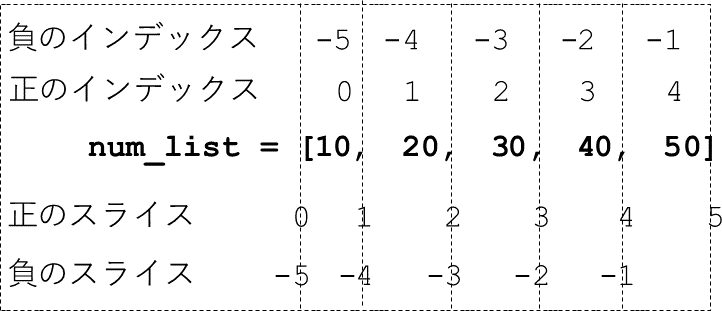

In [4]:
num_list[1:4]

[20, 30, 40]

C言語の配列の場合と異なり、リストを格納した変数はコピーできます。ただし、コピーされるのは先頭要素のアドレスなので、メモリ上の実態は同じものを指します。別のリストを作成してコピーする場合は、a.copy() というメソッドを使います（リストが入れ子になっている場合はこの方法でもさらに注意が必要です）。

In [5]:
a = [5, 8, 3]
b = a
print(b)
a[1] = 2
print(b)

[5, 8, 3]
[5, 2, 3]


In [6]:
a = [5, 8, 3]
b = a.copy()
print(b)
a[1] = 2
print(b)

[5, 8, 3]
[5, 8, 3]


## タプル

タプルはカンマで区切られた要素を \() で囲ったものです。要素へのアクセスはインデックスによって行えますが、リストと違って要素の追加や変更はできません。リストのようにいつでも変更が可能なオブジェクトをミュータブル、タプルのように一度定義すると変更ができないオブジェクトをイミュータブルといいます。

In [7]:
a = (2, 8, 7, 1, 5)
a[1]

8

In [8]:
# タプルを書き換えようとしているのでエラーになる
a[1] = 3

TypeError: ignored

## 辞書

キーと値のペアで複数の要素をまとめる方法です。要素へはインデックスではなく、キーでアクセスできます。キーは文字列などのイミュータブルなオブジェクトでなければいけません。辞書自体は要素の追加・変更・削除ができるミュータブルなオブジェクトです。

In [9]:
b = {'name': 'Tom Bean', 'age': 21, 'point':80}
b['name']

'Tom Bean'

# 制御構造

条件に応じて実行するプログラムを変えたり、繰り返したりする方法を制御構造とよびます。

## 条件分岐

プログラム2では、負の数を入力されるとおかしな計算結果になります。また、0を入力されると0での除算（r2 = x/r1の行）が起こるので、プログラムが停止してしまいます。このような入力の誤りに対処するために、条件によってプログラムの実行箇所を変更できるif文を使って入力をチェックします。

条件が成立したときに実行したいコードはブロックとしてインデントを付けて書きます。同じインデントを持つ一連の行はブロックを構成します。

if文は条件不成立のときに実行するelseを書くことができます。elseの後に条件を書きたいときは else if ではなく elif を使います。

C言語で使われるswitch文はPythonにはありません。

### プログラム3

プログラム2の入力部分のみを取り出し、値をチェックするようにしたものです。

In [10]:
%reset -f
# 入力が正のときのみ、その値を表示して正常終了
import sys

x = int(input('Enter integer> '))
if x <= 0:
  print('Input error!')
  sys.exit()
print(x)

Enter integer> 3
3


## 繰り返し

### for文

一定回数を繰り返すfor文はrange関数を使ってループ変数を与えます。なお、繰り返し処理の内部では、繰り返しを強制的に中止するbreak文、残りの処理をスキップして次の繰り返しに移るcontinue文が使えます。

### プログラム4

for文を使うとプログラム2は以下のようになります（プログラム3の変更も組み入れています）。

In [11]:
%reset -f
# ニュートン法で平方根を求める
import sys

x = int(input('Enter integer> '))
if x <= 0:
  print('Input error!')
  sys.exit()
rnew = float(x)

for i in range(3):
  r1 = rnew
  r2 = x/r1
  rnew = (r1 + r2)/2
  print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

Enter integer> 3
1.0 < 2.0 < 3.0
1.5 < 1.75 < 2.0
1.7143 < 1.7321 < 1.75


リストの操作には主としてfor文を用います。

リストの定義には、要素を列挙する外延表記だけではなく、要素の性質を記述する内包表記が可能です。

In [12]:
even_list = [i*2 for i in range(1, 11)]
even_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

リストの各要素についての処理は、ループ変数を必要としません。リストの先頭から順にひとつずつ要素を取り出してループ処理を行うというイメージです。

In [14]:
num_list = [10, 20, 30, 40, 50]
for x in num_list:
  print(x)

10
20
30
40
50


インデックスを使う場合は以下のようにします。

In [15]:
for i, x in enumerate(num_list):
  print(f'num_list[{i}] = {x}')

num_list[0] = 10
num_list[1] = 20
num_list[2] = 30
num_list[3] = 40
num_list[4] = 50


### while文

while文を使って条件が成立する間、処理を繰り返すことができます。

なおC言語のdo-while文はPythonにはありません。

### プログラム5

while文を使って、2つの近似値が一定の差以下になるまで繰り返しています。なお、absは絶対値を求める組み込み関数です。


In [16]:
%reset -f
# 2つの近似値が一定の差以下になるまで繰り返し
import sys

x = int(input('Enter integer> '))
if x <= 0:
  print('Input error!')
  sys.exit()
rnew = float(x)
diff = rnew - x/rnew

while diff > 1.0E-3:
  r1 = rnew
  r2 = x/r1
  rnew = (r1 + r2)/2
  diff = abs(r1 - r2)

print(f'{r2:.8} < {rnew:.8} < {r1:.8}')

Enter integer> 5
2.2360671 < 2.236068 < 2.2360689


## 練習問題1-1

九九の表を表示してください。

## 練習問題1-2

プログラム5を無限ループとbreak文を使って書き直してください。

## 練習問題1-3

以下に示す辞書を要素とするリストに対して、name と score を適切にフォーマットして出力するループを記述してください。

In [ ]:
results = [{'name':'Asahi', 'score':68}, {'name':'Iino', 'score':79}, {'name':'Ueda', 'score':61}]

## 解答例

### 練習問題1-1

In [17]:
%reset -f
# 九九の表

for i in range(1,10):
  for j in range(1,10):
    print(f'{i*j:3}', end="")
  print()

  1  2  3  4  5  6  7  8  9
  2  4  6  8 10 12 14 16 18
  3  6  9 12 15 18 21 24 27
  4  8 12 16 20 24 28 32 36
  5 10 15 20 25 30 35 40 45
  6 12 18 24 30 36 42 48 54
  7 14 21 28 35 42 49 56 63
  8 16 24 32 40 48 56 64 72
  9 18 27 36 45 54 63 72 81


### 練習問題1-2

In [18]:
%reset -f
# 2つの近似値が一定の差以下になるまで繰り返し
import sys

x = int(input('Enter integer> '))
if x <= 0:
  print('Input error!')
  sys.exit()
rnew = x

while True:
  r1 = rnew
  r2 = x/r1
  rnew = (r1 + r2)/2
  if abs(r1 - r2) < 1.0E-3:
    break

print(f'{r2:.8} < {rnew:.8} < {r1:.8}')

Enter integer> 2
1.4142114 < 1.4142136 < 1.4142157


### 練習問題 1-3



In [19]:
%reset -f
results = [{'name':'Asahi', 'score':68}, {'name':'Iino', 'score':79}, {'name':'Ueda', 'score':61}]

for r in results:
  print(f"{r['name']:8} : {r['score']}")

Asahi    : 68
Iino     : 79
Ueda     : 61


# エラーへの対処

プログラム3では、0以下の値が入ってきたときのみ対処可能でした。しかし、このようにユーザに自由な入力を許す状況では数値以外のものが入力されてエラーとなる可能性もあります。たとえばこの平方根を求めるプログラムは正の浮動小数点数でも正しく動作するのですが、小数点 . （ピリオド）の代わりに間違って , （カンマ）を入力してしまうような状況があり得ます。

また、エラーが出たらプログラムを終了するのではなく、再度入力させるように変更した方がユーザにとっても使いやすいプログラムになります。

そのようなことを実現するために、エラーが起こりえるコードをtry以下のブロックで記述し、そこで発生した例外に対してexcept以下のブロックで対処する方法を使います。

### プログラム6

try文を使って例外を受け取ることで入力のエラーチェックを行います。

In [20]:
%reset -f
# 入力が正しくなるまで繰り返し
import sys

while True:
  x = input('Enter positive number> ')
  try:
    x = float(x)
  except ValueError:
    print(f'{x}は数値に変換できません。')
    continue
  except:
    print('予期せぬエラーです')
    sys.exit()
  if x <= 0:
    print(f'{x}は正の数値ではありません。')
    continue
  break

print(x)

Enter positive number> -1
-1.0は正の数値ではありません。
Enter positive number> abc
abcは数値に変換できません。
Enter positive number> 3
3.0
